In [11]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from scipy import interp
#Algorithms
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
##################################################
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=20)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [12]:
Dataset = pd.read_csv("Dataset_Final.csv")

In [13]:
Dataset.isnull().sum()

Unnamed: 0                        0
Hospital_Name                     0
Age                               0
BMI                               0
LOS                               0
Average_Daily_Use_Cigarettes      0
Hookah_Consumption                0
SystolicBP                        0
DiastolicBP                       0
Respiratory_rate                  0
Oxygen_Saturation_Percent         0
Intubation_Duration_Day           0
ICU_LOS                           0
Total_Lung_Involvement_Percent    0
NIV_Duration_Day                  0
Total_Lung_Involvement_Rank       8
Sex                               0
Current_Smoking                   0
History_hookah                    0
Drug_history                      0
Sweating                          0
Fever                             0
Dyspnea                           0
Chestpain                         0
Abnormal_Lung_Signs               0
Diabetes                          0
Hypertension                      0
Cancers                     

In [14]:
Dataset.drop("Unnamed: 0", axis = 1 , inplace=True)
Dataset.drop("Hospital_Name", axis = 1 , inplace=True)
Dataset.drop("Total_Lung_Involvement_Rank", axis = 1 , inplace=True)
Dataset.drop("Hookah_Consumption", axis = 1 , inplace=True)
Dataset.drop("LOS", axis = 1 , inplace=True)
Dataset.drop("ICU_LOS", axis = 1 , inplace=True)
Dataset.head()

,Age,BMI,Average_Daily_Use_Cigarettes,SystolicBP,DiastolicBP,Respiratory_rate,Oxygen_Saturation_Percent,Intubation_Duration_Day,Total_Lung_Involvement_Percent,NIV_Duration_Day,...,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,ICU_admission,Death
0,61.0,20.500000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,1,0,0.0,1.0,1
1,74.0,26.700000,0.0,40.000000,75.0,16.000000,75.0,0,0.0,0,...,0,1,1,0,0,0,1,1.0,1.0,1
2,51.0,29.100000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,0,0,1.0,1.0,1
3,64.0,41.000000,0.0,136.000000,78.0,20.000000,95.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0
4,20.0,26.148507,0.0,113.000000,76.0,19.000000,92.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,2.0,1


In [15]:
#Controlling Outlier data
data_mean, data_std = np.mean(Dataset['Age']), np.std(Dataset['Age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['BMI']), np.std(Dataset['BMI'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))


for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] < lower:
        Dataset['BMI'][i] = lower
        
        
for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] > upper:
        Dataset['BMI'][i] = upper
        

outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Average_Daily_Use_Cigarettes']), np.std(Dataset['Average_Daily_Use_Cigarettes'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] < lower:
        Dataset['Average_Daily_Use_Cigarettes'][i] = lower
        
        
for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] > upper:
        Dataset['Average_Daily_Use_Cigarettes'][i] = upper
        

outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['SystolicBP']), np.std(Dataset['SystolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] < lower:
        Dataset['SystolicBP'][i] = lower
        
        
for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] > upper:
        Dataset['SystolicBP'][i] = upper
        

outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['DiastolicBP']), np.std(Dataset['DiastolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] < lower:
        Dataset['DiastolicBP'][i] = lower
       

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] > upper:
        Dataset['DiastolicBP'][i] = upper
    

outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Respiratory_rate']), np.std(Dataset['Respiratory_rate'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] < lower:
        Dataset['Respiratory_rate'][i] = lower
 
        
for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] > upper:
        Dataset['Respiratory_rate'][i] = upper
   

outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Oxygen_Saturation_Percent']), np.std(Dataset['Oxygen_Saturation_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] < lower:
        Dataset['Oxygen_Saturation_Percent'][i] = lower

        
for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] > upper:
        Dataset['Oxygen_Saturation_Percent'][i] = upper


outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Intubation_Duration_Day']), np.std(Dataset['Intubation_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] < lower:
        Dataset['Intubation_Duration_Day'][i] = lower

        
for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] > upper:
        Dataset['Intubation_Duration_Day'][i] = upper


outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Total_Lung_Involvement_Percent']), np.std(Dataset['Total_Lung_Involvement_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] < lower:
        Dataset['Total_Lung_Involvement_Percent'][i] = lower

        
for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] > upper:
        Dataset['Total_Lung_Involvement_Percent'][i] = upper


outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['NIV_Duration_Day']), np.std(Dataset['NIV_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] < lower:
        Dataset['NIV_Duration_Day'][i] = lower

        
for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] > upper:
        Dataset['NIV_Duration_Day'][i] = upper


outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

Age Column Identified outliers: 0
BMI Column Identified outliers: 8
BMI Column Identified outliers: 0
Average_Daily_Use_Cigarettes Column Identified outliers: 8
Average_Daily_Use_Cigarettes Column Identified outliers: 0
SystolicBP Column Identified outliers: 9
SystolicBP Column Identified outliers: 0
DiastolicBP Column Identified outliers: 9
DiastolicBP Column Identified outliers: 0
Respiratory_rate Column Identified outliers: 6
Respiratory_rate Column Identified outliers: 0
Oxygen_Saturation_Percent Column Identified outliers: 14
Oxygen_Saturation_Percent Column Identified outliers: 0
Intubation_Duration_Day Column Identified outliers: 13
Intubation_Duration_Day Column Identified outliers: 0
Total_Lung_Involvement_Percent Column Identified outliers: 30
Total_Lung_Involvement_Percent Column Identified outliers: 0
NIV_Duration_Day Column Identified outliers: 11
NIV_Duration_Day Column Identified outliers: 0


C:\Users\alish\AppData\Local\Temp\ipykernel_9152\1012456011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['BMI'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\1012456011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Average_Daily_Use_Cigarettes'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\1012456011.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['SystolicBP'][i

In [16]:
X = Dataset[Dataset.columns.difference(["Death"])] 
Y = Dataset["Death"]

In [17]:
sm = SMOTE(random_state=42)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [18]:
X_balanced[['Age', 'BMI','Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']] = normalize(X_balanced[['Age', 'BMI', 'Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']])
X_balanced.head()

,Abnormal_Lung_Signs,Age,Antihypertensive_drug,Average_Daily_Use_Cigarettes,BMI,CKD,COPD,Cancers,Cardiovascular_Disease,Chestpain,...,Immunosuppressant_Drugs,Intubation_Duration_Day,NIV_Duration_Day,Oxygen_Saturation_Percent,Pantoprazole,Respiratory_rate,Sex,Sweating,SystolicBP,Total_Lung_Involvement_Percent
0,0,0.331393,1,0.0,0.111370,0,0,0,0,0,...,0,0.0,0.0,0.494373,0,0.107125,1.0,0,0.665082,0.0
1,0,0.504618,0,0.0,0.182071,1,0,0,1,0,...,0,0.0,0.0,0.511437,1,0.109106,1.0,0,0.420918,0.0
2,0,0.279945,0,0.0,0.159734,0,0,0,0,0,...,0,0.0,0.0,0.499511,0,0.108238,1.0,0,0.671994,0.0
3,0,0.322031,0,0.0,0.187998,0,0,0,0,0,...,0,0.0,0.0,0.478015,0,0.100635,1.0,0,0.684317,0.0
4,0,0.118566,0,0.0,0.155016,0,0,0,0,0,...,0,0.0,0.0,0.545404,0,0.112638,1.0,0,0.669898,0.0


In [19]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
def showResults(model, modelType , X, Y):
    scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
    scores_briar = cross_val_score(model, X, Y, cv=10, scoring='neg_brier_score')
    scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    scores_recall = cross_val_score(model, X, Y, cv=10, scoring='recall')
    scores_precision = cross_val_score(model, X, Y, cv=10, scoring='precision')
    scores_f1 = cross_val_score(model, X, Y, cv=10, scoring='f1')
    print('K-fold cross-validation results:')
    print(modelType ," average accuracy is %2.3f" % scores_accuracy.mean())
    print(modelType ," average log_loss is %2.3f" % -scores_log_loss.mean())
    print(modelType ," average brier score is %2.3f" % -scores_briar.mean())
    print(modelType ," average auc is %2.3f" % scores_auc.mean())
    print(modelType ," average recall is %2.3f" % scores_recall.mean())
    print(modelType ," average precision is %2.3f" % scores_precision.mean())
    print(modelType ," average f1 is %2.3f" % scores_f1.mean())

In [10]:
#Physician Opinion Input + Post admission variables
x_1 = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs",
            'Intubation_Duration_Day','NIV_Duration_Day',"ICU_admission"]]
y_1 = Y_balanced

#Feature Importance with extratreesclassifier Input + Post admission variables
x_2 = X_balanced[["ICU_admission", "Age", "Oxygen_Saturation_Percent", "CKD", "DiastolicBP", "Respiratory_rate",
               "SystolicBP", "Intubation_Duration_Day", "BMI", "Cancers", "Dyspnea", "Drug_history", "Pantoprazole",
               "Abnormal_Lung_Signs", "Fever", "Cardiovascular_Disease", "Antihypertensive_drug", "Hypertension",
               "Hospitalization_14_days_ago", "Average_Daily_Use_Cigarettes"]]
y_2 = Y_balanced

#RFECV with Random Forest Input + Post admission variables
x_3 = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Average_Daily_Use_Cigarettes', 'BMI', 'CKD', 'Cancers',
                'DiastolicBP', 'Drug_history', 'Dyspnea', 'Fever', 'Hospitalization_14_days_ago',
                'Hypertension', 'ICU_admission', 'Intubation_Duration_Day', 'Oxygen_Saturation_Percent',
                'Pantoprazole', 'Respiratory_rate', 'SystolicBP']]
y_3 = Y_balanced

#Feature Importance Gradient Boosting + Post admission variables
x_4 = X_balanced[["ICU_admission", "Age", "Intubation_Duration_Day", "Oxygen_Saturation_Percent", "CKD", 
               "Cancers", "Respiratory_rate", "SystolicBP", "DiastolicBP", "BMI", "Average_Daily_Use_Cigarettes",
               "Drug_history", "Abnormal_Lung_Signs", "COPD", "Sweating", "Total_Lung_Involvement_Percent", 
                "Chestpain", "Cardiovascular_Disease", "Sex", "Hospitalization_14_days_ago"]]
y_4 = Y_balanced

In [37]:
xgb_1 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb_1.fit(x_1,y_1)

xgb_2 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.1, colsample_bytree = 0.3)
xgb_2.fit(x_2,y_2)

xgb_3 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.5)
xgb_3.fit(x_3,y_3)

xgb_4 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 10, learning_rate = 0.01, colsample_bytree = 0.5)
xgb_4.fit(X,Y)

#######################################################################################################
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
svc = SVC(random_state=5, C = 100, gamma=1,kernel='poly',probability=True)
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 300)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'gini',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)
knn = KNeighborsClassifier(metric = 'manhattan',
                            n_neighbors = 6,
                            weights = 'distance')

estimators=[("XGboost", xgb), ("SVM", svc),  ("RandomForest", rf),
           ("DecisionTree", dt), ("KNN", knn)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(x_1,y_1)

VotingClassifier(estimators=[('XGboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.3,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=...
                                  probability=True, random_state=5)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=16,
                                                     min_samples_leaf=3,
                                                     min_samples_split=8,
                                                     n_estimators=300,
                                                     random_state=5)),
                             ('DecisionTree',
                              DecisionTreeClassifier(max_depth=16,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=5)),
                             ('KNN',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=6,
                                                   weights='distance'))],
                 voting='soft')

C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:11: DeprecationWarning: scipy.interp is deprecated and will be remove

C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:81: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:81: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_30072\972467547.py:81: DeprecationWarning: scipy.interp is deprecated and will be remove

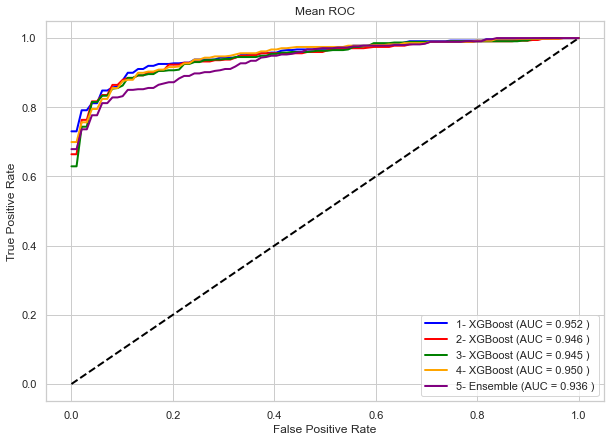

In [46]:
cv = StratifiedKFold(n_splits=10,shuffle=False)
plt.figure(figsize=(10,7))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_1,y_1):
    prediction = xgb_1.fit(x_1.iloc[train],y_1.iloc[train]).predict_proba(x_1.iloc[test])
    fpr, tpr, t = roc_curve(y_1[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'1- XGBoost (AUC = 0.952 )' % (mean_auc),lw=2, alpha=1)
#####################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_2,y_2):
    prediction = xgb_2.fit(x_2.iloc[train],y_2.iloc[train]).predict_proba(x_2.iloc[test])
    fpr, tpr, t = roc_curve(y_2[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'2- XGBoost (AUC = 0.946 )' % (mean_auc),lw=2, alpha=1)    
######################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_3,y_3):
    prediction = xgb_3.fit(x_3.iloc[train],y_3.iloc[train]).predict_proba(x_3.iloc[test])
    fpr, tpr, t = roc_curve(y_3[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='green',
         label=r'3- XGBoost (AUC = 0.945 )' % (mean_auc),lw=2, alpha=1)   
######################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_4,y_3):
    prediction = xgb_4.fit(x_4.iloc[train],y_4.iloc[train]).predict_proba(x_4.iloc[test])
    fpr, tpr, t = roc_curve(y_4[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='orange',
         label=r'4- XGBoost (AUC = 0.950 )' % (mean_auc),lw=2, alpha=1)   
######################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_1,y_1):
    prediction = ensemble.fit(x_1.iloc[train],y_1.iloc[train]).predict_proba(x_1.iloc[test])
    fpr, tpr, t = roc_curve(y_1[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='purple',
         label=r'5- Ensemble (AUC = 0.936 )' % (mean_auc),lw=2, alpha=1)   

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC')
plt.legend(loc="lower right")
plt.show()

In [20]:
#Feature Importance Gradient Boosting
x_1 = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", 
                "SystolicBP","BMI", "Average_Daily_Use_Cigarettes" , "Pantoprazole", "Cancers",
                "Hypertension", "Abnormal_Lung_Signs", "Drug_history", "Sex", 
                "Total_Lung_Involvement_Percent", "Hospitalization_14_days_ago",
                "Current_Smoking", "Cardiovascular_Disease", "COPD", "Diabetes"]]
y_1 = Y_balanced

#Physician Opinion Input 
x_2 = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs"]]
y_2 = Y_balanced

#Feature Importance with extratreesclassifier Input
x_3 = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", "SystolicBP",
                "BMI","Cancers","Average_Daily_Use_Cigarettes" ,"Fever", "Pantoprazole", "Abnormal_Lung_Signs",
                "Drug_history", "Current_Smoking", "Diabetes", "Cardiovascular_Disease" , "Dyspnea", "Hospitalization_14_days_ago",
                "Hypertension", "Antihypertensive_drug"]]
y_3 = Y_balanced

#RFECV with Random Forest Input
x_4 = X_balanced[["Abnormal_Lung_Signs", "Age", "Antihypertensive_drug", "Average_Daily_Use_Cigarettes", "BMI", 
                "CKD", "COPD", "Cancers", "Cardiovascular_Disease", "Chestpain","Current_Smoking", 
                "Diabetes", "DiastolicBP", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", 
                "Oxygen_Saturation_Percent", "Pantoprazole", "Respiratory_rate", "Sex", "Sweating", 
                "SystolicBP", "Total_Lung_Involvement_Percent"]]
y_4 = Y_balanced

In [22]:
xgb_1 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb_1.fit(x_1,y_1)

xgb_2 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.5)
xgb_2.fit(x_2,y_2)

xgb_3 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb_3.fit(x_3,y_3)

xgb_4 = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=900,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
xgb_4.fit(x_4,y_4)

#####################################################################################################

xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=700,
                   max_depth = 15, learning_rate = 0.01, colsample_bytree = 0.3)
mlp = MLPClassifier(max_iter=5000, random_state=5, activation = 'relu', alpha = 0.0001, 
                    hidden_layer_sizes = 15, learning_rate = 'constant', solver = 'lbfgs')
rf = RandomForestClassifier(random_state=5, 
                            max_depth = 16, 
                            min_samples_leaf = 3, 
                            min_samples_split = 8, 
                            n_estimators = 900)
dt = DecisionTreeClassifier(random_state=5, 
                            criterion = 'entropy',
                            max_depth = 16,
                            min_samples_leaf = 3, 
                            min_samples_split = 10)


estimators=[("XGboost", xgb), ("MLP", mlp), ("RandomForest", rf),
           ("DecisionTree", dt)]

ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(x_3,y_3)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('XGboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.3,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=...
                              MLPClassifier(hidden_layer_sizes=15,
                                            max_iter=5000, random_state=5,
                                            solver='lbfgs')),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=16,
                                                     min_samples_leaf=3,
                                                     min_samples_split=8,
                                                     n_estimators=900,
                                                     random_state=5)),
                             ('DecisionTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=16,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=5))],
                 voting='soft')

C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in 

C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\AppData\Local\Temp\ipykernel_9152\208304516.py:81: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter

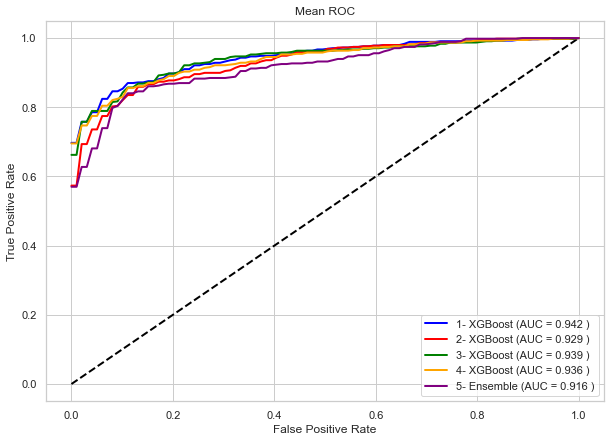

In [23]:
cv = StratifiedKFold(n_splits=10,shuffle=False)
plt.figure(figsize=(10,7))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_1,y_1):
    prediction = xgb_1.fit(x_1.iloc[train],y_1.iloc[train]).predict_proba(x_1.iloc[test])
    fpr, tpr, t = roc_curve(y_1[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'1- XGBoost (AUC = 0.942 )' % (mean_auc),lw=2, alpha=1)
#####################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_2,y_2):
    prediction = xgb_2.fit(x_2.iloc[train],y_2.iloc[train]).predict_proba(x_2.iloc[test])
    fpr, tpr, t = roc_curve(y_2[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'2- XGBoost (AUC = 0.929 )' % (mean_auc),lw=2, alpha=1)    
######################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_3,y_3):
    prediction = xgb_3.fit(x_3.iloc[train],y_3.iloc[train]).predict_proba(x_3.iloc[test])
    fpr, tpr, t = roc_curve(y_3[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='green',
         label=r'3- XGBoost (AUC = 0.939 )' % (mean_auc),lw=2, alpha=1)   
######################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_4,y_3):
    prediction = xgb_4.fit(x_4.iloc[train],y_4.iloc[train]).predict_proba(x_4.iloc[test])
    fpr, tpr, t = roc_curve(y_4[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='orange',
         label=r'4- XGBoost (AUC = 0.936 )' % (mean_auc),lw=2, alpha=1)   
######################################################################################################
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_3,y_3):
    prediction = ensemble.fit(x_3.iloc[train],y_3.iloc[train]).predict_proba(x_3.iloc[test])
    fpr, tpr, t = roc_curve(y_3[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    i= i+1

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='purple',
         label=r'5- Ensemble (AUC = 0.916 )' % (mean_auc),lw=2, alpha=1)   

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC')
plt.legend(loc="lower right")
plt.show()